In [1]:
# ML-Assignment 1 - Statistical Measures

# You are given house_price.csv which contains property prices in the city of Bangalore.
# You need to examine price per square feet do the following:
# Q1. Perform basic EDA (Score:1) 
# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
#     a) Mean and Standard deviation 
#     b)Percentile method 
#     c) IQR(Inter quartile range method) 
#     d) Z Score method 
# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1) 
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. (Score:1) 
# Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1) 
# Q6. Draw Scatter plot between the variables to check the correlation between them

# basic EDA

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.shape

(13200, 7)

In [13]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [14]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [15]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

# OUTLIERS

## Let's create box plots to visualize outliers for the numerical columns: total_sqft, bath, price, and price_per_sqft. This will help determine which method works best for outlier removal.

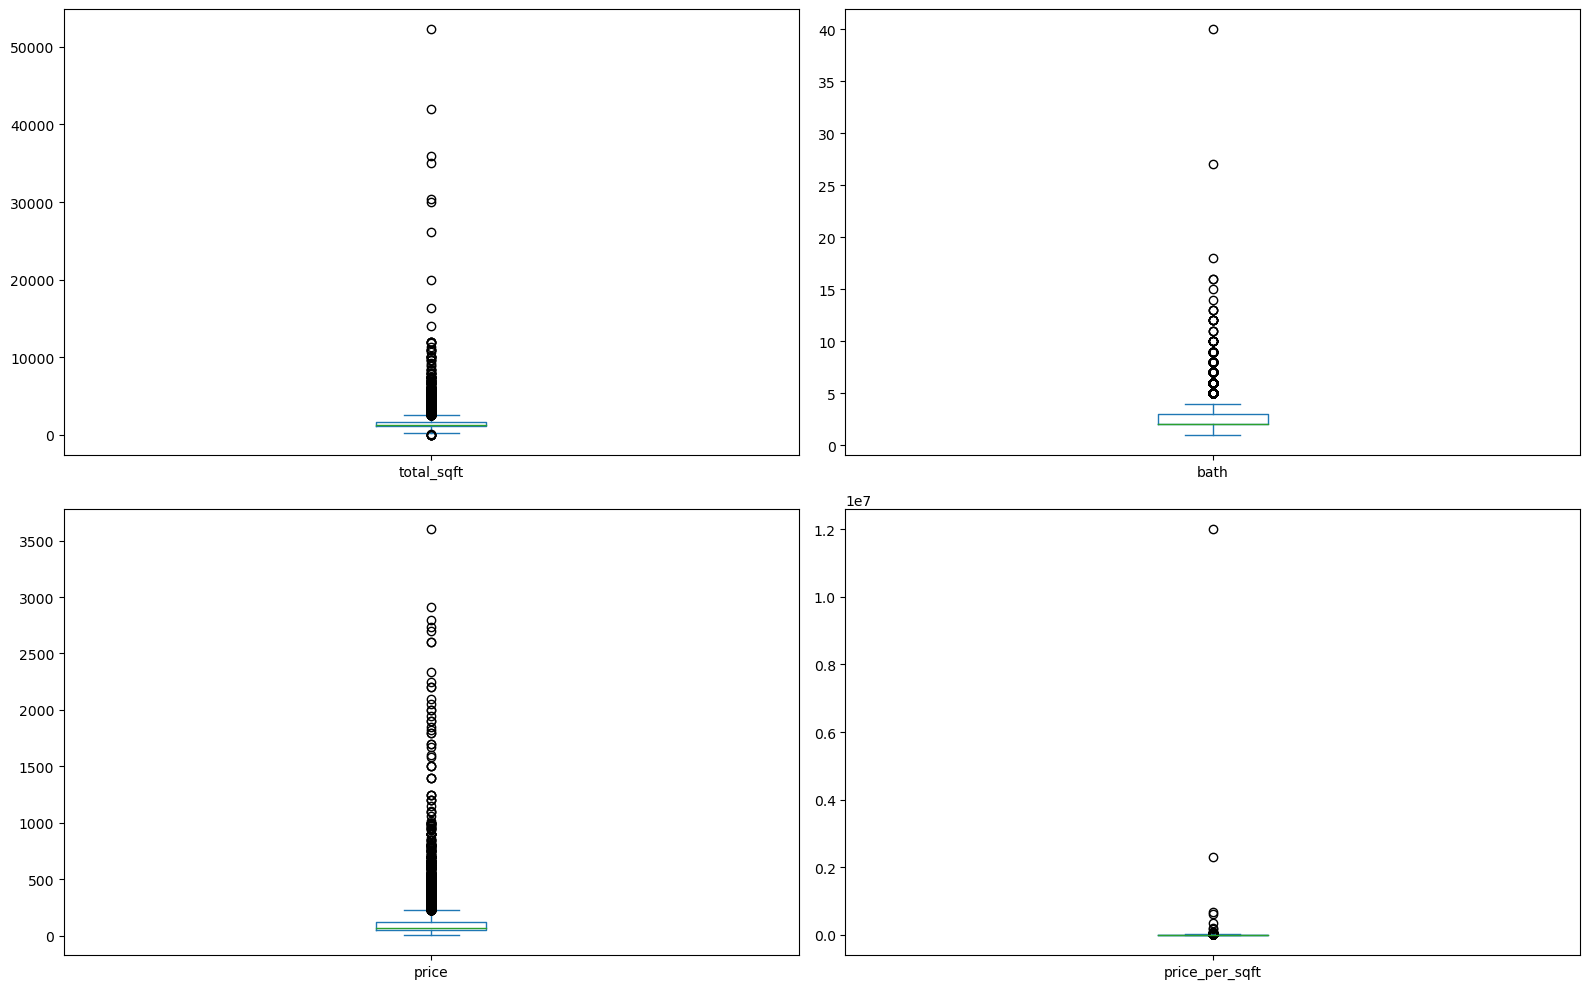

In [16]:
numerical_cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(16, 10))
plt.tight_layout()
plt.show()

* OBSERVATION:Price has the highest number of outliers and Price per Sqft follows

### Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
####     Mean and Standard deviation 
####     Percentile method 
####     IQR(Inter quartile range method) 
####     Z Score method 

## 1. Z-score method

In [17]:
# # Z-score method for the column price
# df['Z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()
# threshold = 3   # Define threshold (typically 3 or -3)
# outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]  # Find outliers
# print("Outliers:")
# print(outliers)

Outliers:
                 location       size  total_sqft  bath   price  bhk  \
7            Rajaji Nagar      4 BHK     3300.00   4.0   600.0    4   
61             Whitefield  4 Bedroom     5700.00   5.0   650.0    4   
157    Mahalakshmi Layout  4 Bedroom     3750.00   4.0   760.0    4   
404          Rajaji Nagar      7 BHK    12000.00   6.0  2200.0    7   
435            Whitefield  4 Bedroom    11890.00   4.0   700.0    4   
...                   ...        ...         ...   ...     ...  ...   
12967               other      5 BHK     5665.84   7.0   988.0    5   
12976               other      4 BHK     6652.00   6.0   660.0    4   
13000               other  4 Bedroom     6688.00   6.0   700.0    4   
13078               other  4 Bedroom     9200.00   4.0  2600.0    4   
13081               other  6 Bedroom     8000.00   6.0  2800.0    6   

       price_per_sqft    Z_score  
7               18181   3.269452  
61              11403   3.604627  
157             20266   4.342011

<AxesSubplot:xlabel='price'>

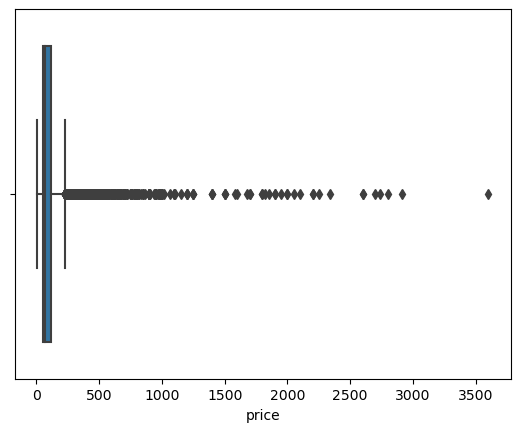

In [18]:
# sns.boxplot(df['price'])

In [19]:
# df_cleaned = df[(df['Z_score'] <= threshold) & (df['Z_score'] >= -threshold)]
# df_cleaned = df_cleaned.drop(columns=['Z_score'])
# print("Data after removing outliers:")
# print(df_cleaned)

Data after removing outliers:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699

<AxesSubplot:xlabel='price'>

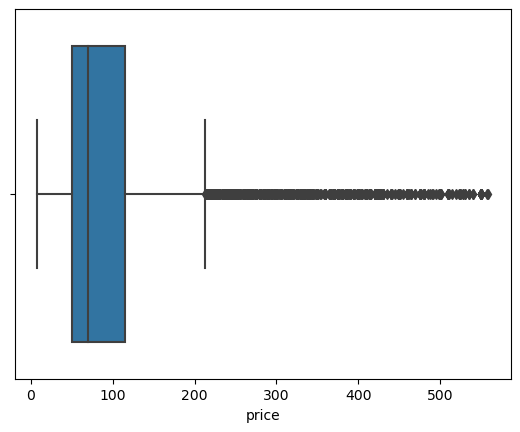

In [20]:
# sns.boxplot(df_cleaned['price'])

## 2. Mean and Standard deviation method

In [22]:
# #Mean and Standard deviation for the column total_sqft
# #Find the limits
# ul=df['total_sqft'].mean() + 3*df['total_sqft'].std()
# ll=df['total_sqft'].mean() - 3*df['total_sqft'].std()
# print('upper limit:',ul)
# print('lower limit:',ll)

upper limit: 5267.273119159082
lower limit: -2156.667553249992


In [23]:
# #Find outliers for the column total_sqft
# df.loc[(df['total_sqft']>ul)|(df['total_sqft']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403,3.604627
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500,2.444923
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333,13.995039
435,Whitefield,4 Bedroom,11890.0,4.0,700.0,4,5887,3.939802
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.0,4,1705,0.219364
...,...,...,...,...,...,...,...,...
12976,other,4 BHK,6652.0,6.0,660.0,4,9921,3.671662
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466,3.939802
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260,16.676435
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,18.017134


In [24]:
# #Delete the outlier data using Trimming 
# new_df=df.loc[(df['total_sqft']<=ul)&(df['total_sqft']>=ll)]
# print("Length of old data:",len(df))
# print("Length of new data:",len(new_df))
# print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 13083
Outliers: 117


<AxesSubplot:xlabel='total_sqft'>

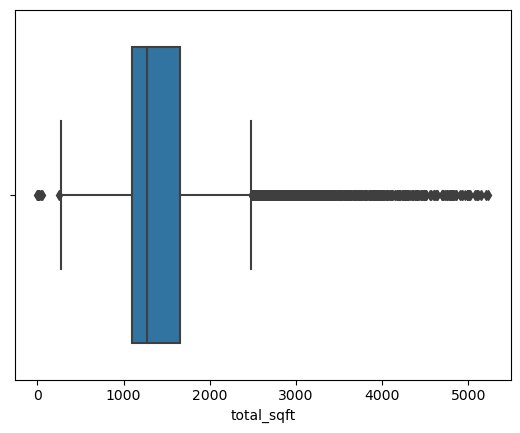

In [25]:
# sns.boxplot(new_df['total_sqft'])

In [26]:
# #Changing the oulier values to upper or lower limit values : Capping
# new_df=df.copy()
# new_df.loc[new_df['total_sqft']>ul,'total_sqft']=ul
# new_df.loc[new_df['total_sqft']<ll,'total_sqft']=ll

<AxesSubplot:xlabel='total_sqft'>

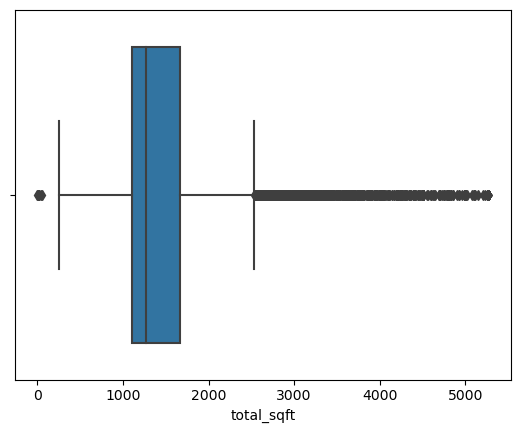

In [27]:
# sns.boxplot(new_df['total_sqft'])

## 3. IQR(Inter quartile range method)

In [29]:
# # IQR(Inter quartile range method) for the column price_per_sqft
# Q1 = df['price_per_sqft'].quantile(0.25)
# Q3 = df['price_per_sqft'].quantile(0.75)
# IQR = Q3 - Q1
# print("Q1:",Q1)
# print("Q3:",Q3)
# print("IQR:",IQR)

Q1: 4267.0
Q3: 7317.0
IQR: 3050.0


In [30]:
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR
# print("Lower limit:",lower_limit)
# print("Upper limit:",upper_limit)

Lower limit: -308.0
Upper limit: 11892.0


<AxesSubplot:xlabel='price_per_sqft'>

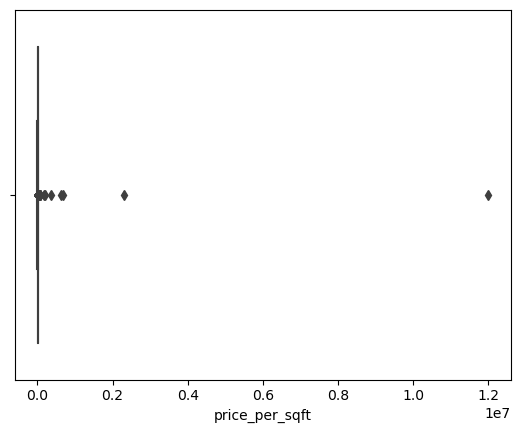

In [31]:
# sns.boxplot(df['price_per_sqft'])

In [32]:
# #Find outliers for the column price_per_sqft
# df.loc[(df['price_per_sqft']>ul)|(df['price_per_sqft']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.0,3,6245,-0.115811
6,Old Airport Road,4 BHK,2732.0,4.0,204.0,4,7467,0.614870
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,3.269452
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,1.727649
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592,1.224888
...,...,...,...,...,...,...,...,...
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666,0.923230
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.0,3,6530,-0.001851
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689,0.795864
13196,other,4 BHK,3600.0,5.0,400.0,4,11111,1.928754


In [33]:
# #Delete the outlier data using Trimming 
# new_df=df.loc[(df['price_per_sqft']<=ul)&(df['price_per_sqft']>=ll)]
# print("Length of old data:",len(df))
# print("Length of new data:",len(new_df))
# print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 6195
Outliers: 7005


<AxesSubplot:xlabel='price_per_sqft'>

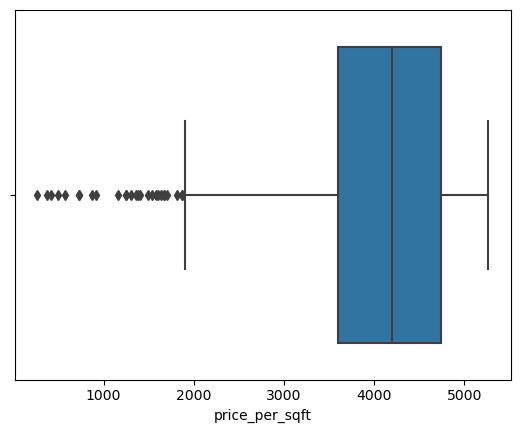

In [34]:
# sns.boxplot(new_df['price_per_sqft'])

In [35]:
# # Changing the oulier values to upper or lower limit values : Capping
# new_df=df.copy()
# new_df.loc[new_df['price_per_sqft']>ul,'price_per_sqft']=ul
# new_df.loc[new_df['price_per_sqft']<ll,'price_per_sqft']=ll

<AxesSubplot:xlabel='price_per_sqft'>

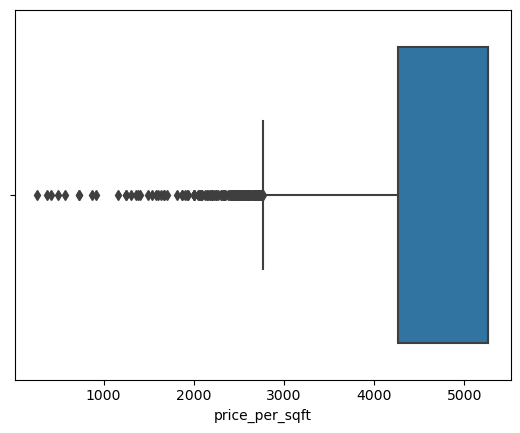

In [36]:
# sns.boxplot(new_df['price_per_sqft'])

## 4. Percentile method

In [38]:
# Percentile method for column price
ul=df['price'].quantile(0.99)
ll=df['price'].quantile(0.01)
print("Upper limit:",ul)
print("Lower limit",ll)


Upper limit: 660.0
Lower limit 19.0


<AxesSubplot:xlabel='price'>

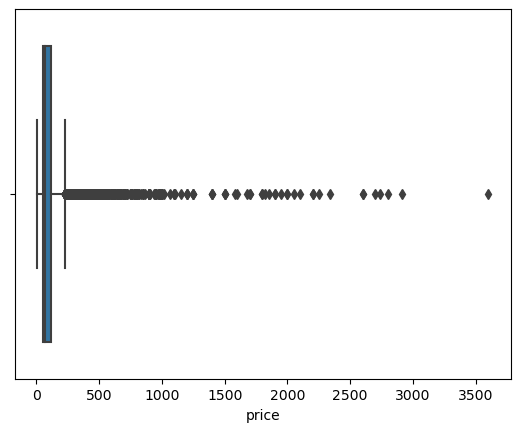

In [39]:
sns.boxplot(df['price'])

In [40]:
#Find outliers for the column price
df.loc[(df['price']>ul)|(df['price']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500,-0.652090
99,Chandapura,2 BHK,650.0,1.0,17.00,2,2615,-0.638683
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875,-0.642035
157,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.00,4,20266,4.342011
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444,-0.678904
...,...,...,...,...,...,...,...,...
13078,other,4 Bedroom,9200.0,4.0,2600.00,4,28260,16.676435
13081,other,6 Bedroom,8000.0,6.0,2800.00,6,35000,18.017134
13101,Attibele,1 BHK,520.0,1.0,15.00,1,2884,-0.652090
13105,Chandapura,1 BHK,520.0,1.0,14.04,1,2700,-0.658525


In [41]:
#Delete the outlier data using Trimming 
new_df=df.loc[(df['price']<=ul)&(df['price']>=ll)]
print("Length of old data:",len(df))
print("Length of new data:",len(new_df))
print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 12941
Outliers: 259


<AxesSubplot:xlabel='price'>

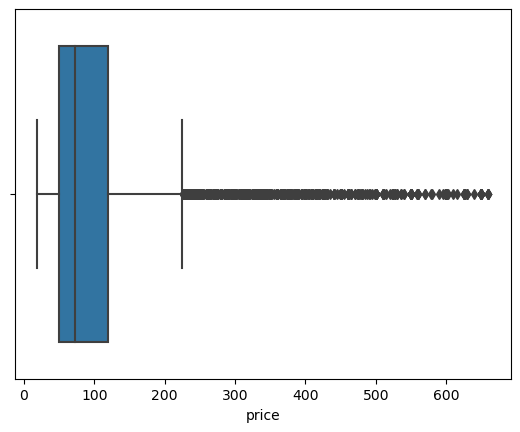

In [42]:
sns.boxplot(new_df['price'])

In [43]:
# Changing the oulier values to upper or lower limit values : Capping
new_df=df.copy()
new_df.loc[new_df['price']>ul,'price']=ul
new_df.loc[new_df['price']<ll,'price']=ll

<AxesSubplot:xlabel='price'>

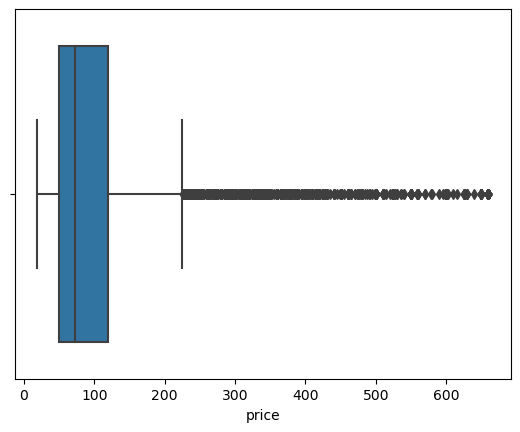

In [44]:
sns.boxplot(new_df['price'])

* OBSERVATIONS: 
    IQR method for price per sqft and Percentile method for price are the best for this dataset.
    Z-score and Mean-Standard Deviation are not suitable due to the skewness of real estate data.

## Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

Before Transformation:
Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


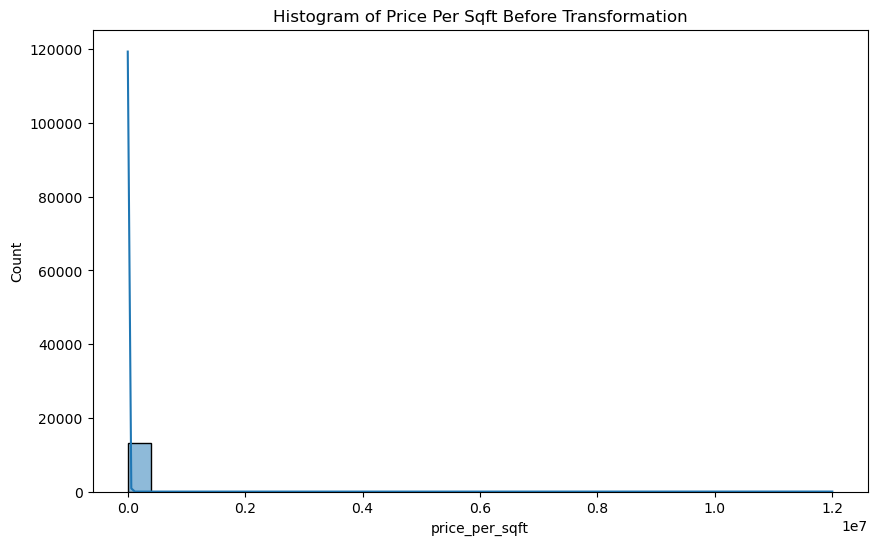

In [49]:
print("Before Transformation:")
# Calculate Skewness and Kurtosis
print("Skewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurt())

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title("Histogram of Price Per Sqft Before Transformation")
plt.show()




Before Transformation:
* Skewness: 108.28 (Highly right-skewed)
* Kurtosis: 12095.21 (Extremely high, indicating heavy-tailed distribution)
* The histogram showed a long right tail, meaning a few properties have significantly higher price per sqft compared to the majority.

In [50]:
# Apply Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])


After Log Transformation:
Skewness after log transformation: 1.4004850530059296
Kurtosis after log transformation: 9.206942162860814


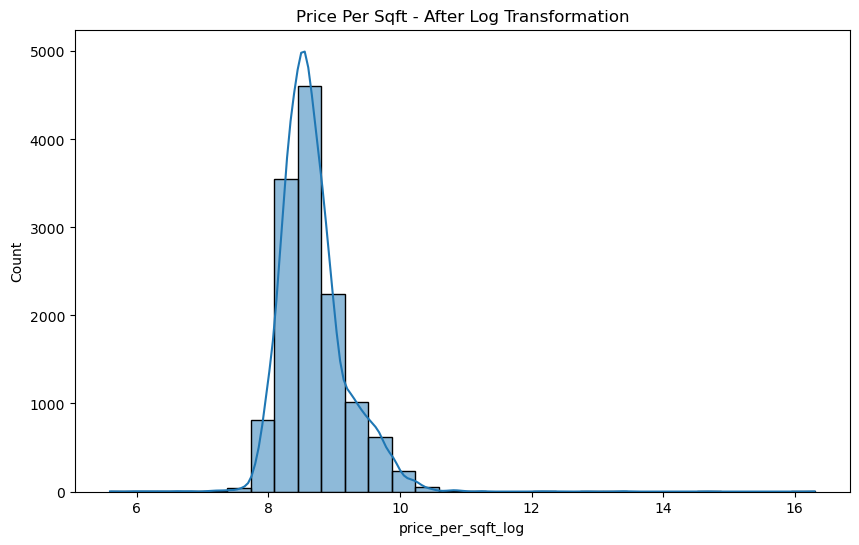

In [51]:
print("\nAfter Log Transformation:")

# Skewness and Kurtosis after transformation
print("Skewness after log transformation:", df['price_per_sqft_log'].skew())
print("Kurtosis after log transformation:", df['price_per_sqft_log'].kurt())

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], bins=30, kde=True)
plt.title('Price Per Sqft - After Log Transformation')
plt.show()



After Log Transformation:

* Skewness: 1.40 (Much closer to normal)
* Kurtosis: 9.21 (Reduced, but still indicates some outliers)
* The distribution became more symmetric and closer to normal, which helps improve statistical analysis and machine learning model performance.

* OBSERVATION:
    * The log transformation significantly improved normality, reducing skewness and kurtosis.
    * While the data is still slightly skewed, it is now more suitable for modeling and statistical tests that assume normality.

## Check the correlation between all the numerical columns and plot heatmap. 

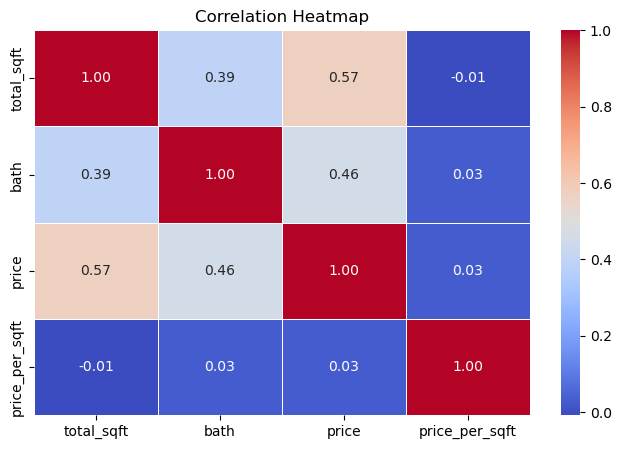

In [56]:
cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
correlation_matrix = df[cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



## Draw Scatter plot between the variables to check the correlation between them

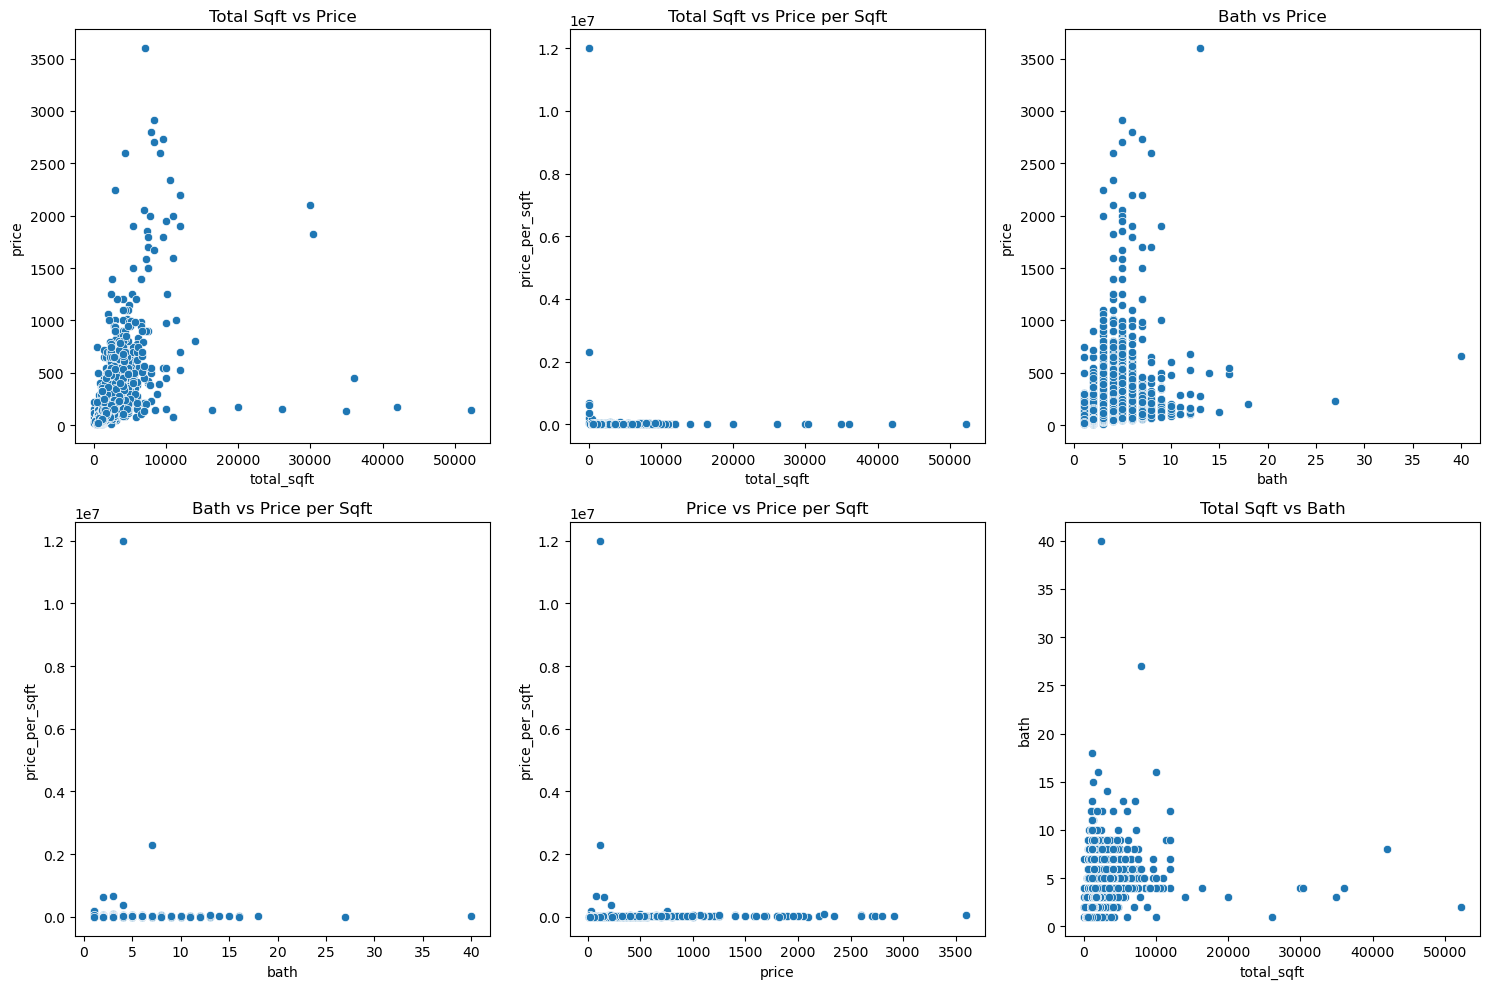

In [57]:
cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
plt.figure(figsize=(15, 10))

# total_sqft vs price
plt.subplot(2, 3, 1)
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')

# total_sqft vs price_per_sqft
plt.subplot(2, 3, 2)
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Total Sqft vs Price per Sqft')

# bath vs price
plt.subplot(2, 3, 3)
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Bath vs Price')

# bath vs price_per_sqft
plt.subplot(2, 3, 4)
sns.scatterplot(x='bath', y='price_per_sqft', data=df)
plt.title('Bath vs Price per Sqft')

# price vs price_per_sqft
plt.subplot(2, 3, 5)
sns.scatterplot(x='price', y='price_per_sqft', data=df)
plt.title('Price vs Price per Sqft')

# total_sqft vs bath
plt.subplot(2, 3, 6)
sns.scatterplot(x='total_sqft', y='bath', data=df)
plt.title('Total Sqft vs Bath')

plt.tight_layout()
plt.show()

*OBSERVATIONS:
* Total Sqft vs. Price → Strong positive correlation
* Total Sqft vs. Price per Sqft → Weak or negative correlation
* Bath vs. Price → Moderate correlation, indicating that properties with more bathrooms are generally more expensive.
* Bath vs. Price per Sqft → Weak correlation.
* Price vs. Price per Sqft → Non-linear relationship.
* Total Sqft vs. Bath → Positive correlation, as larger properties tend to have more bathrooms